In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import math
# import trieste
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from mo_lp.experiment import single_run, Config
from mo_lp import test_functions

2022-01-23 11:39:24.531508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-23 11:39:24.531550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-23 11:39:27.772387: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-23 11:39:27.772429: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-23 11:39:27.772748: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2022-01-23 11:39:27.774072: I tensorflow/core/platform/cpu_fe

## Simple 1d input case

In [3]:
config_dict = {
    "test_function_name": test_functions.Simple1D.name,
    "n_initial_points": 3,
    "n_query_points": 4,
    "n_optimization_steps": 3,
    "n_repeats": 5
}


config_dict["acquisition_method_name"] = "BatchMC"
config = Config.from_dict(config_dict)
batch_mc_hv_regret = single_run(config)


config_dict["acquisition_method_name"] = "DistanceBased"
config = Config.from_dict(config_dict)
mo_lp_hv_regret = single_run(config)

2022-01-23 11:39:31.777081: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Running BatchMC with batch size 4 for 3 iterations


2022-01-23 11:39:33.083718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-23 11:39:33.130783: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2208005000 Hz


Optimization completed without errors
Finished in 20.440828561782837s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 18.449519634246826s
Running BatchMC with batch size 4 for 3 iterations


2022-01-23 11:40:28.844431: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1200000000 exceeds 10% of free system memory.
2022-01-23 11:40:29.124646: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1200000000 exceeds 10% of free system memory.
2022-01-23 11:40:29.336487: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1200000000 exceeds 10% of free system memory.


Optimization completed without errors
Finished in 25.030828952789307s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 19.159252166748047s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 19.797374963760376s
Running DistanceBased with batch size 4 for 3 iterations
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Optimization completed without errors
Finished in 12.750169038772583s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 12.325135707855225s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 12.030211210250854s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 12.20256233215332s
Running DistanceBased with batch size 4 for

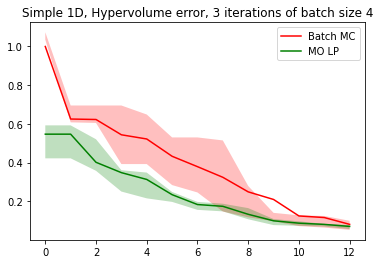

In [4]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

x = range(config.n_optimization_steps * config.n_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"{config.test_function_name}, Hypervolume error, {config.n_optimization_steps} iterations of batch size {config.n_query_points}")
plt.legend()
plt.show()

## 2d input functions from Gardner et al. 2014

In [5]:
config_dict = {
    "test_function_name": test_functions.Gardner2D.name,
    "n_initial_points": 3,
    "n_query_points": 4,
    "n_optimization_steps": 3,
    "n_repeats": 5
}


config_dict["acquisition_method_name"] = "BatchMC"
config = Config.from_dict(config_dict)
batch_mc_hv_regret = single_run(config)


config_dict["acquisition_method_name"] = "DistanceBased"
config = Config.from_dict(config_dict)
mo_lp_hv_regret = single_run(config)

Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 43.859554290771484s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 59.75718832015991s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 54.949951171875s
Running BatchMC with batch size 4 for 3 iterations


2022-01-23 10:54:34.243786: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1152000000 exceeds 10% of free system memory.
2022-01-23 10:54:34.536075: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1152000000 exceeds 10% of free system memory.
2022-01-23 10:54:34.748671: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1152000000 exceeds 10% of free system memory.


Optimization completed without errors
Finished in 38.382718086242676s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 53.63039040565491s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 13.392547369003296s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 15.401167869567871s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 13.623733520507812s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 14.074432849884033s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 13.70213508605957s


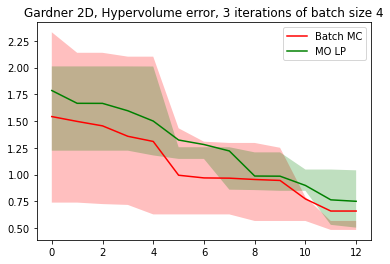

In [6]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

x = range(config.n_optimization_steps * config.n_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"{config.test_function_name}, Hypervolume error, {config.n_optimization_steps} iterations of batch size {config.n_query_points}")
plt.legend()
plt.show()

## Function with 3 objectives

In [ ]:
config_dict = {
    "test_function_name": test_functions.DTLZ2.name,
    "n_initial_points": 3,
    "n_query_points": 3,
    "n_optimization_steps": 4,
    "n_repeats": 5
}


config_dict["acquisition_method_name"] = "BatchMC"
config = Config.from_dict(config_dict)
batch_mc_hv_regret = single_run(config)


config_dict["acquisition_method_name"] = "DistanceBased"
config = Config.from_dict(config_dict)
mo_lp_hv_regret = single_run(config)

Running BatchMC with batch size 3 for 4 iterations


2022-01-23 11:30:11.719779: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3456000000 exceeds 10% of free system memory.
2022-01-23 11:30:12.453303: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3456000000 exceeds 10% of free system memory.
